In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import load_files
from glob import glob
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tqdm import tqdm


Using TensorFlow backend.


AttributeError: module 'tensorflow.python.keras.backend' has no attribute 'get_graph'

In [10]:
def load_dataset(path):
    data=load_files(path)
    dog_files=np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

In [11]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset(r'C:\Users\rahul midha\Desktop\MISSION Machine Learning ipynb files\Dog\dogimages\train')

NameError: name 'np_utils' is not defined

In [4]:
valid_files, valid_targets = load_dataset(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\dogimages\valid')

In [5]:
test_files, test_targets = load_dataset(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\dogimages\test')

In [6]:
#train_files, valid_files, test_files - numpy arrays containing file paths to images

#train_targets, valid_targets, test_targets - numpy arrays containing onehot-encoded classification labels 


In [7]:
# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\dogimages\train\*'))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [8]:
ResNet50_model= ResNet50(weights='imagenet')

In [9]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

from keras.applications.resnet50 import preprocess_input

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

### Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\bottleneck_features\DogResnet50Data.npz')
train_DogResnet50 = bottleneck_features['train']
valid_DogResnet50 = bottleneck_features['valid']
test_DogResnet50 = bottleneck_features['test']

### Define your architecture.
Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_DogResnet50.shape[1:]))
Resnet50_model.add(Dropout(0.3))
Resnet50_model.add(Dense(units=133, activation='softmax'))

Resnet50_model.summary()

### Compile the model.
#Resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
### Train the model.
checkpointer = ModelCheckpoint(filepath=r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\saved_models\weights.best.ResNet50.hdf5', 
                               verbose=1, save_best_only=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [10]:
Resnet50_model.fit(train_DogResnet50, train_targets, 
          validation_data=(valid_DogResnet50, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer])



Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - ETA: 48s - loss: 5.5278 - accuracy: 0.062 - ETA: 8s - loss: 5.7895 - accuracy: 0.022 - ETA: 4s - loss: 5.6481 - accuracy: 0.02 - ETA: 4s - loss: 5.5946 - accuracy: 0.02 - ETA: 3s - loss: 5.3031 - accuracy: 0.04 - ETA: 3s - loss: 5.1545 - accuracy: 0.06 - ETA: 3s - loss: 4.9200 - accuracy: 0.08 - ETA: 2s - loss: 4.6584 - accuracy: 0.11 - ETA: 2s - loss: 4.4442 - accuracy: 0.13 - ETA: 2s - loss: 4.2747 - accuracy: 0.15 - ETA: 2s - loss: 4.1337 - accuracy: 0.16 - ETA: 2s - loss: 4.0007 - accuracy: 0.18 - ETA: 1s - loss: 3.8071 - accuracy: 0.21 - ETA: 1s - loss: 3.6748 - accuracy: 0.23 - ETA: 1s - loss: 3.5132 - accuracy: 0.26 - ETA: 1s - loss: 3.3661 - accuracy: 0.28 - ETA: 1s - loss: 3.2299 - accuracy: 0.30 - ETA: 1s - loss: 3.1179 - accuracy: 0.32 - ETA: 1s - loss: 3.0056 - accuracy: 0.34 - ETA: 0s - loss: 2.8914 - accuracy: 0.36 - ETA: 0s - loss: 2.7758 - accuracy: 0.38 - ETA: 0s - l

6680/6680 [==============================] - ETA: 1s - loss: 0.0336 - accuracy: 1.00 - ETA: 1s - loss: 0.0622 - accuracy: 0.99 - ETA: 1s - loss: 0.0599 - accuracy: 0.99 - ETA: 1s - loss: 0.0524 - accuracy: 0.99 - ETA: 1s - loss: 0.0516 - accuracy: 0.99 - ETA: 1s - loss: 0.0527 - accuracy: 0.99 - ETA: 1s - loss: 0.0500 - accuracy: 0.99 - ETA: 0s - loss: 0.0493 - accuracy: 0.99 - ETA: 0s - loss: 0.0483 - accuracy: 0.99 - ETA: 0s - loss: 0.0524 - accuracy: 0.99 - ETA: 0s - loss: 0.0525 - accuracy: 0.99 - ETA: 0s - loss: 0.0519 - accuracy: 0.99 - ETA: 0s - loss: 0.0517 - accuracy: 0.99 - ETA: 0s - loss: 0.0516 - accuracy: 0.99 - ETA: 0s - loss: 0.0519 - accuracy: 0.99 - ETA: 0s - loss: 0.0521 - accuracy: 0.99 - ETA: 0s - loss: 0.0516 - accuracy: 0.99 - ETA: 0s - loss: 0.0522 - accuracy: 0.99 - ETA: 0s - loss: 0.0515 - accuracy: 0.99 - ETA: 0s - loss: 0.0527 - accuracy: 0.99 - ETA: 0s - loss: 0.0539 - accuracy: 0.99 - ETA: 0s - loss: 0.0546 - accuracy: 0.99 - ETA: 0s - loss: 0.0549 - accura

6680/6680 [==============================] - ETA: 1s - loss: 0.0114 - accuracy: 1.00 - ETA: 1s - loss: 0.0160 - accuracy: 1.00 - ETA: 1s - loss: 0.0184 - accuracy: 0.99 - ETA: 1s - loss: 0.0198 - accuracy: 0.99 - ETA: 1s - loss: 0.0229 - accuracy: 0.99 - ETA: 1s - loss: 0.0219 - accuracy: 0.99 - ETA: 1s - loss: 0.0214 - accuracy: 0.99 - ETA: 1s - loss: 0.0214 - accuracy: 0.99 - ETA: 1s - loss: 0.0206 - accuracy: 0.99 - ETA: 1s - loss: 0.0200 - accuracy: 0.99 - ETA: 1s - loss: 0.0197 - accuracy: 0.99 - ETA: 1s - loss: 0.0199 - accuracy: 0.99 - ETA: 1s - loss: 0.0210 - accuracy: 0.99 - ETA: 1s - loss: 0.0208 - accuracy: 0.99 - ETA: 0s - loss: 0.0221 - accuracy: 0.99 - ETA: 0s - loss: 0.0222 - accuracy: 0.99 - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - ETA: 0s - loss: 0.0219 - accuracy: 0.99 - ETA: 0s - loss: 0.0213 - accuracy: 0.99 - ETA: 0s - loss: 0.0223 - accuracy: 0.99 - ETA: 0s - loss: 0.0225 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accura

In [11]:
### Load the model weights with the best validation loss.
Resnet50_model.load_weights(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\saved_models\weights.best.ResNet50.hdf5')


In [12]:
### Calculate classification accuracy on the test dataset.
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_DogResnet50]

# Report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

def extract_Resnet50(tensor): 
    return ResNet50(weights='imagenet',include_top=False,pooling='avg').predict(preprocess_input(tensor))
### Function takes a path to an image as input and returns predicted dog breed
def dog_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    bottleneck_feature = np.expand_dims(bottleneck_feature, axis=0)
    bottleneck_feature = np.expand_dims(bottleneck_feature, axis=0)
    #bottleneck_feature = np.expand_dims(bottleneck_feature, axis=0)
    #obtain predicted vector
    predicted_vector = Resnet50_model.predict(bottleneck_feature)
    print(type(predicted_vector))
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

def dog_breed_predictor(img_path):
    # determine the predicted dog breed
    breed = dog_breed(img_path) 
    # display the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    # display relevant predictor result
    if dog_detector(img_path):
        print("This dog's breed is: " + str(breed).split("\\")[-1]) 

    else:
        print("I don't know what this is.")

Test accuracy: 83.2536%


<class 'numpy.ndarray'>


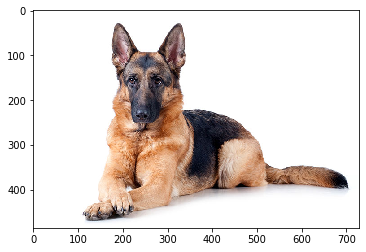

This dog's breed is: 071.German_shepherd_do


In [13]:
dog_breed_predictor(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\images\1.jpg')

<class 'numpy.ndarray'>


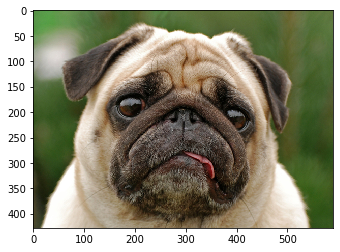

This dog's breed is: 040.Bulldo


In [14]:
dog_breed_predictor(r'C:\Users\Hyden\Desktop\Presentation\Dog-breed-classifier-master\images\Acute-Dog-Diarrhea-47066074.jpg')